In [1]:
from laserhockey_main import main

In [2]:
m3ddpg = main()

In [ ]:
rewards = m3ddpg.train(200000)

100%|█████████████████████████████████████████████████████████████████████████▋| 298768/300000 [31:56<00:12, 98.50it/s]

In [4]:
import pylab as plt
import numpy as np
import laserhockey.hockey_env as h_env

IndexError: index 1 is out of bounds for axis 0 with size 1

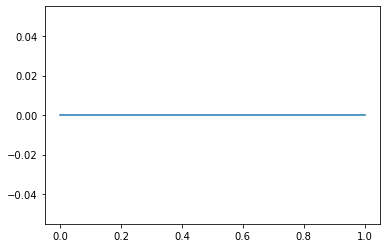

In [5]:
plt.close()
plt.plot(rewards[0], label="Left Actor")
plt.plot(rewards[1], label="Right Actor")
plt.plot(np.array(rewards).sum(axis=0), label="score sum")
plt.legend()

In [9]:
rewards

array([0., 0.])

In [7]:
actor_left = m3ddpg.get_policy(0)
actor_right = m3ddpg.get_policy(1)

In [8]:
env = h_env.HockeyEnv()

In [9]:
for _ in range(10):
    obs_left = env.reset()
    obs_right = env.obs_agent_two()
    for _ in range(250):
        env.render()
        action1 = actor_left(obs_left)
        action2 = actor_right(obs_right)
        obs_left, r, d, info = env.step(np.hstack([action1,action2]))
        obs_right = env.obs_agent_two()
        if d: break
env.close()